In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [2]:
SAMPLE_TEXT = "Does this thing really work? Lets see."

In [3]:
sent_tokenize(SAMPLE_TEXT)

['Does this thing really work?', 'Lets see.']

In [4]:
words = word_tokenize(SAMPLE_TEXT)
words

['Does', 'this', 'thing', 'really', 'work', '?', 'Lets', 'see', '.']

In [5]:
from nltk.corpus import stopwords

In [6]:
stop = stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [7]:
clean_words = [w for w in words if not w.lower() in stop]
clean_words

['thing', 'really', 'work', '?', 'Lets', 'see', '.']

In [8]:
stem_words = ["play", "played", "playing", "player", "happier"]
from nltk.stem import PorterStemmer
ps = PorterStemmer()
for w in stem_words:
    print (ps.stem(w))

play
play
play
player
happier


In [9]:
from nltk.corpus import state_union

In [10]:
text = state_union.raw("2006-GWBush.txt")

In [11]:
text

'PRESIDENT GEORGE W. BUSH\'S ADDRESS BEFORE A JOINT SESSION OF THE CONGRESS ON THE STATE OF THE UNION\n \nJanuary 31, 2006\n\nTHE PRESIDENT: Thank you all. Mr. Speaker, Vice President Cheney, members of Congress, members of the Supreme Court and diplomatic corps, distinguished guests, and fellow citizens: Today our nation lost a beloved, graceful, courageous woman who called America to its founding ideals and carried on a noble dream. Tonight we are comforted by the hope of a glad reunion with the husband who was taken so long ago, and we are grateful for the good life of Coretta Scott King. (Applause.)\n\nPresident George W. Bush reacts to applause during his State of the Union Address at the Capitol, Tuesday, Jan. 31, 2006. White House photo by Eric DraperEvery time I\'m invited to this rostrum, I\'m humbled by the privilege, and mindful of the history we\'ve seen together. We have gathered under this Capitol dome in moments of national mourning and national achievement. We have serv

In [12]:
from nltk import pos_tag

In [13]:
from nltk import pos_tag
pos = pos_tag(word_tokenize(text.lower()))
pos[0:50]

[('president', 'NN'),
 ('george', 'NN'),
 ('w.', 'VBD'),
 ('bush', 'NN'),
 ("'s", 'POS'),
 ('address', 'NN'),
 ('before', 'IN'),
 ('a', 'DT'),
 ('joint', 'JJ'),
 ('session', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('congress', 'NN'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('state', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('union', 'NN'),
 ('january', 'NN'),
 ('31', 'CD'),
 (',', ','),
 ('2006', 'CD'),
 ('the', 'DT'),
 ('president', 'NN'),
 (':', ':'),
 ('thank', 'NN'),
 ('you', 'PRP'),
 ('all', 'DT'),
 ('.', '.'),
 ('mr.', 'NN'),
 ('speaker', 'NN'),
 (',', ','),
 ('vice', 'NN'),
 ('president', 'NN'),
 ('cheney', 'NN'),
 (',', ','),
 ('members', 'NNS'),
 ('of', 'IN'),
 ('congress', 'NN'),
 (',', ','),
 ('members', 'NNS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('supreme', 'JJ'),
 ('court', 'NN'),
 ('and', 'CC'),
 ('diplomatic', 'JJ'),
 ('corps', 'NN'),
 (',', ',')]

In [14]:
from nltk.stem import WordNetLemmatizer

In [15]:
lem = WordNetLemmatizer()

In [16]:
lem.lemmatize("good", pos = 'a')

'good'

In [17]:
lem.lemmatize("better", pos = 'a')

'good'

In [18]:
lem.lemmatize("painting", pos = 'n')

'painting'

In [19]:
lem.lemmatize("painting", pos = 'v')

'paint'

In [20]:
from nltk.corpus import wordnet

In [21]:
w1 = wordnet.synset("ship.n.01")
w2 = wordnet.synset("boat.n.01")
w1.wup_similarity(w2)

0.9090909090909091

In [22]:
from nltk import ne_chunk

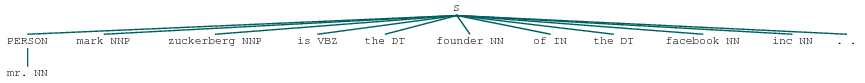

In [23]:
sentence = "Mr. Mark Zuckerberg is the founder of the Facebook inc."
ne_chunk(pos_tag(word_tokenize(sentence.lower())))

In [24]:
from nltk.corpus import movie_reviews
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk import pos_tag
from nltk.corpus import stopwords
import string 

stop = stopwords.words("english")
punc = list(string.punctuation)
stop = stop + punc
stop
 
def mapFromPostTagToWordnet(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''
    
def getLemmatizedWords(word_list):
    pos = pos_tag(word_list)
    lemmatized_words = []
    for (word,tag) in pos:
        tag = mapFromPostTagToWordnet(tag)
        if not (tag == ""):
            lemmatized_words.append(lem.lemmatize(word, pos = tag))
        else:
            lemmatized_words.append(word)
    return lemmatized_words

def clean_data(word_list):
    #Removing stop words
    clean_words = [w for w in word_list if not w.lower() in stop]
    #Lemmatizing
    lemmatized_words = getLemmatizedWords(clean_words)
    return lemmatized_words

In [25]:
documents = []
for category in movie_reviews.categories():
    for fileid in movie_reviews.fileids(category):
        documents.append((clean_data(movie_reviews.words(fileid)), category))
documents[0:5]

[(['plot',
   'two',
   'teen',
   'couple',
   'go',
   'church',
   'party',
   'drink',
   'drive',
   'get',
   'accident',
   'one',
   'guy',
   'die',
   'girlfriend',
   'continue',
   'see',
   'life',
   'nightmare',
   'deal',
   'watch',
   'movie',
   'sorta',
   'find',
   'critique',
   'mind',
   'fuck',
   'movie',
   'teen',
   'generation',
   'touch',
   'cool',
   'idea',
   'present',
   'bad',
   'package',
   'make',
   'review',
   'even',
   'hard',
   'one',
   'write',
   'since',
   'generally',
   'applaud',
   'film',
   'attempt',
   'break',
   'mold',
   'mess',
   'head',
   'lose',
   'highway',
   'memento',
   'good',
   'bad',
   'way',
   'make',
   'type',
   'film',
   'folk',
   'snag',
   'one',
   'correctly',
   'seem',
   'take',
   'pretty',
   'neat',
   'concept',
   'execute',
   'terribly',
   'problem',
   'movie',
   'well',
   'main',
   'problem',
   'simply',
   'jumble',
   'start',
   'normal',
   'downshift',
   'fantasy',
   

In [26]:
import random
random.seed(0)
random.shuffle(documents)

In [27]:
training_documents = documents[0:1500]
testing_documents = documents[1500:]

In [28]:
import string
all_words = []
for doc in training_documents:
    for w in doc[0]:
        all_words.append(w.lower())

In [29]:
len(all_words)

528985

In [30]:
import nltk
dist = nltk.FreqDist(all_words)
features = dist.most_common(3000)
feature_words = [i[0] for i in features]

In [31]:
import collections
def get_features(document):
    words_count = collections.Counter(document)
    words = set(document)
    features = {}
    for w in feature_words:
        if w in words:
            features[w] = words_count.get(w)
        else:
            features[w] = 0
    return features

In [32]:
training_data = [(get_features(a), b) for (a, b) in training_documents]

In [33]:
testing_data = [(get_features(a), b) for (a, b) in testing_documents]

In [34]:
classifier = nltk.NaiveBayesClassifier.train(training_data)

In [35]:
classifier.show_most_informative_features(10)

Most Informative Features
             outstanding = 1                 pos : neg    =     19.7 : 1.0
                     bad = 5                 neg : pos    =     16.1 : 1.0
                    tale = 2                 pos : neg    =     13.2 : 1.0
                   waste = 2                 neg : pos    =     12.8 : 1.0
               wonderful = 2                 pos : neg    =     11.8 : 1.0
               ludicrous = 1                 neg : pos    =     11.2 : 1.0
               hilarious = 2                 pos : neg    =      9.8 : 1.0
                  castle = 1                 pos : neg    =      9.8 : 1.0
                     bad = 6                 neg : pos    =      9.5 : 1.0
               stupidity = 1                 neg : pos    =      9.3 : 1.0


In [36]:
nltk.classify.accuracy(classifier, testing_data)

0.764

In [37]:
from nltk.classify.scikitlearn import SklearnClassifier
from  sklearn.svm import SVC

In [38]:
classifier_sklearn = SklearnClassifier(SVC(random_state=0))
classifier_sklearn.train(training_data)

<SklearnClassifier(SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False))>

In [39]:
nltk.classify.accuracy(classifier_sklearn, testing_data)

0.788

In [43]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.ensemble import RandomForestClassifier

classifier_sklearn = SklearnClassifier(RandomForestClassifier(n_estimators=500,random_state=0))
classifier_sklearn.train(training_data)
nltk.classify.accuracy(classifier_sklearn, testing_data)

0.824